# Install dependencies

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


pip install opencv-python

# Import libraries

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Get Data.
### This notebook is tested with Cifar10 dataset to make the code scalable to other types of dataset apart from Fashion Mnist Data

In [37]:
data = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = data.load_data()

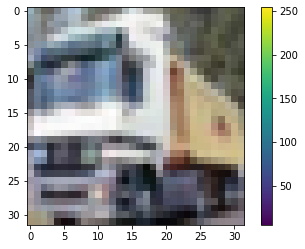

In [21]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

### Plot Data and Define classnames for the data

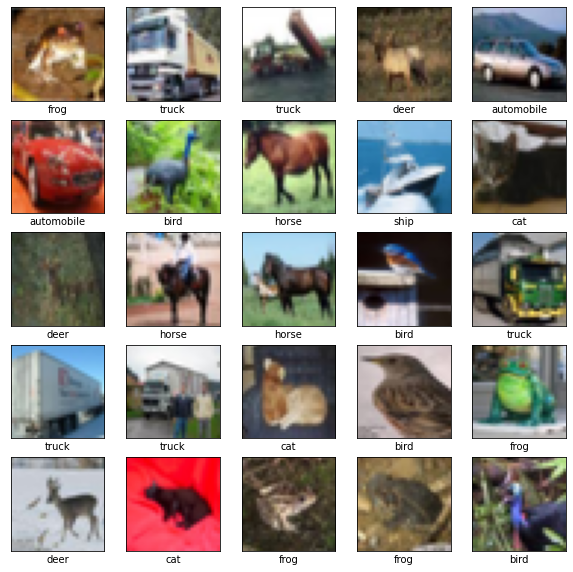

In [38]:
# class_names = [0,1,2,3,4,5,6,7,8,9]
class_names= ["airplane" ,"automobile" , "bird" , "cat" , "deer" , "dog"  , "frog" , "horse" , "ship", "truck"]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Resize the Images to 28x 28 and convert them to grayscale (not required for Fashion Mnist data and Mnist data)

In [39]:
# the list of data (i.e., images) and class images
print("[INFO] loading and resizing training images...")
data = []
# loop over the image paths
for img in train_images:
    image = cv2.resize(img, (28, 28))
#     print(image.shape)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    data.append(gray)
train_images = np.array(data)

[INFO] loading and resizing training images...


### Normalise the Images

In [41]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [42]:
print(train_labels[0], train_images[0].shape)
data_shape = train_images[0].shape

[6] (28, 28)


### Plot the grayscale resized Images

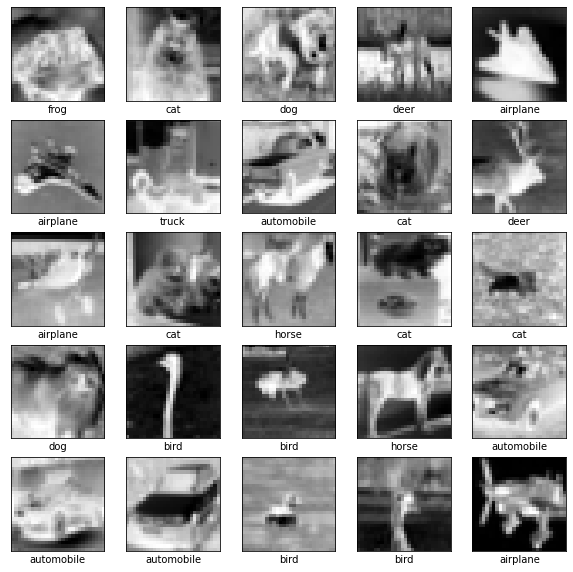

In [26]:
plt.figure(figsize=(10,10))
j = 0
for i in range(25,50):
    plt.subplot(5,5,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
    j = j +1
plt.show()

# Define the model

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Train the model

In [30]:
model.fit(train_images, train_labels, batch_size=128, epochs=10, verbose = 2)

2021-09-02 21:51:25.271293: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 156800000 exceeds 10% of free system memory.


Epoch 1/10
391/391 - 2s - loss: 2.0512 - accuracy: 0.2621
Epoch 2/10
391/391 - 0s - loss: 1.9160 - accuracy: 0.3201
Epoch 3/10
391/391 - 0s - loss: 1.8569 - accuracy: 0.3406
Epoch 4/10
391/391 - 0s - loss: 1.8125 - accuracy: 0.3577
Epoch 5/10
391/391 - 0s - loss: 1.7837 - accuracy: 0.3716
Epoch 6/10
391/391 - 0s - loss: 1.7582 - accuracy: 0.3802
Epoch 7/10
391/391 - 0s - loss: 1.7383 - accuracy: 0.3878
Epoch 8/10
391/391 - 0s - loss: 1.7213 - accuracy: 0.3955
Epoch 9/10
391/391 - 0s - loss: 1.7038 - accuracy: 0.4013
Epoch 10/10
391/391 - 0s - loss: 1.6823 - accuracy: 0.4080


# Save the model

In [33]:
model_name='cifar-model.h5'
model.save(model_name)

In [4]:
ls .

'Cifar Dataset Model training.ipynb'
 cifar-model.h5
 consumer.py
'Fashion Mnist Dataset Model training.ipynb'
 final.h5
'Mnist Dataset Model training.ipynb'
 mnist-model.h5
 producer.py


# Load the model

In [43]:
from tensorflow.keras.models import load_model
model = load_model(model_name)

# Evaluate the model with the test images

### Define the last layer as softmax layer

In [45]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [46]:
predictions = probability_model.predict(test_images)

In [51]:
print(predictions[0], test_labels[0])

[0.07008061 0.02293004 0.24350914 0.06769592 0.27669197 0.05318289
 0.18075141 0.04384591 0.03116048 0.01015163] [3]


In [44]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 1.7069 - accuracy: 0.3989

Test accuracy: 0.39890000224113464


# Plot the Predictions

In [55]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i][0], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i][0]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

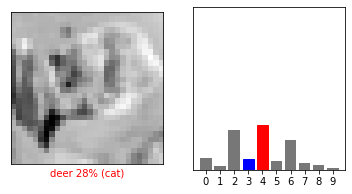

In [57]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

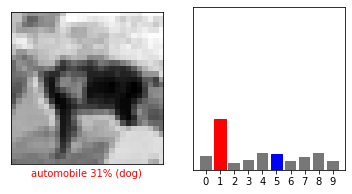

In [58]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

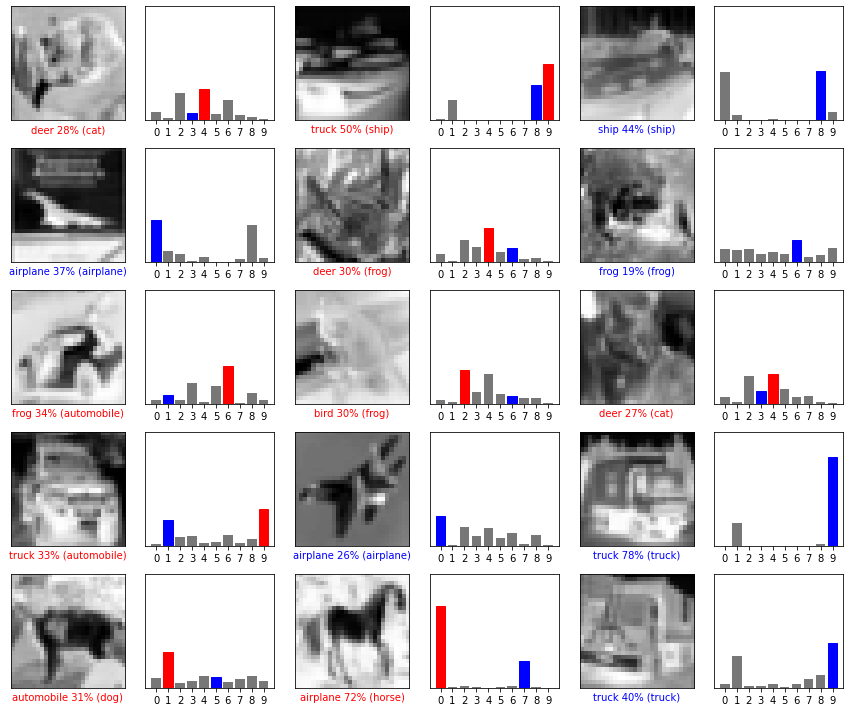

In [59]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Predict for 1 image

In [60]:
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)

(28, 28)


In [61]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [62]:
predictions_single = probability_model.predict(img)
print(predictions_single, np.argmax(predictions_single))

[[1.3800192e-02 1.7844589e-01 3.2129665e-04 7.8234478e-04 2.0553809e-04
  1.6907457e-04 7.6510376e-05 1.4482015e-04 3.0757943e-01 4.9847499e-01]] 9


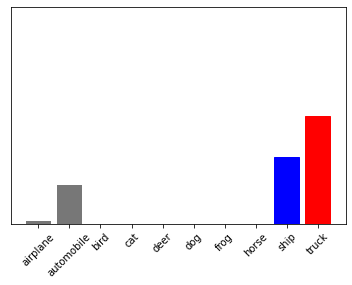

In [63]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()